## Week 3: Challenge 1

- Student: Nicolas Silva Andujar
- Teacher: José Manuel Magallanes

Este notebook contiene las formulas para realizar el challenge 1. Para el desarrollo de esta tarea, se tomará información de Bolivia.


<div class="alert alert-danger">
  <strong>CHALLENGE 1</strong>
    <br> * Create a public repo named "week2_spatial" with its README file. (1 point)
    <br> * Clone the repo to your computer. (1 point)
    <br> * In the local repo in your computer, create a folder named "data". (1 point)
    <br> * Get Three maps for the same country: the lines can be rivers, highways or similar; the points have to be airports; and the polygons  of the 2rd administrative division ('provinces' in Perú, 'counties' in USA). Download those maps into the "data" folder. You can find airports here: https://ourairports.com/data/ (5 points)
    <br> * Plot in one map the three layers of maps, including the code. (5 points)
    <br> * Publish the three layer map. (3 points)
    <br> * Update the README to offer a quick explanation, the data dictionary, and the link to the published map. (2 points)
    <br> * Make sure the code is well organized (explanations, comments, no warnings, no python messages). (2 points)
    
</div>

In [79]:
#Ignoramos los warnings
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

1. Importamos los paquetes y cargamos los archivos de geopandas de los países, autopistas y provincias.

In [80]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("data","World_Countries","World_Countries.shp"))
roads=gpd.read_file(os.path.join("data","World_railroad","ne_10m_roads.shp"))
provincias=gpd.read_file(os.path.join("data","provincia","bol_admbnda_adm2_gov_2020514.shp"))

In [81]:
#Revisamos si hay missing values
countries[countries.isna().any(axis=1)]


,COUNTRY,geometry


2. Revisamos que todos los layers estan en la misma proyección (CRS)

In [82]:
countries.crs==provincias.crs==provincias.crs==roads.crs==roads.crs

True

### Subsetting

3. Filtramos nuestros datos para tener información espacial de **Bolivia**

In [83]:
bolivia=countries[countries.COUNTRY=='Bolivia']

Filtramos las autopistas y provincias de Bolivia

In [84]:
roadsBolivia_clipped = gpd.clip(roads, bolivia)

provinciasBolivia_clipped = gpd.clip(provincias, mask=bolivia)


Hacemos los mapas para las autopistas, provincias y del país.

<Axes: >

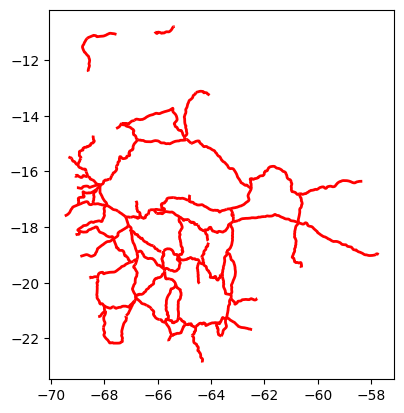

In [85]:
roadsBolivia_clipped.plot(edgecolor='red',
            linewidth=2)

<Axes: >

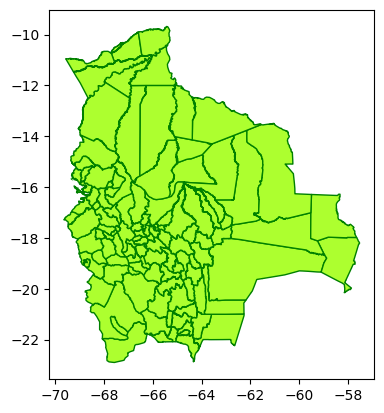

In [86]:
provinciasBolivia_clipped.plot(marker='+', color='greenyellow', markersize=15, edgecolor = "green")

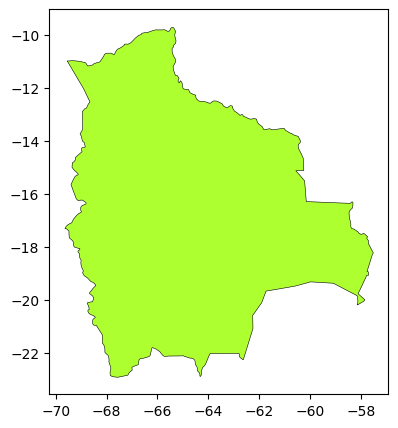

In [87]:
base = bolivia.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))


In [88]:
provinciasBolivia_clipped.plot(marker='+', color='greenyellow', markersize=15,
                    ax=base)
roadsBolivia_clipped.plot(edgecolor='red', linewidth=0.5,
                    ax=base)

<Axes: >

### Map Projection

In [89]:
#revisamos las unidades 
bolivia.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [90]:
#centroid
bolivia.centroid

C:\Users\Nicolas Silva\AppData\Local\Temp\ipykernel_28424\196805054.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bolivia.centroid


24    POINT (-64.6706 -16.71497)
dtype: geometry

### Reprojecting

In [91]:
#recomendado para Bolivia (metros)
bolivia.to_crs(4326).crs.axis_info


[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [92]:
#adaptamos al centroide
bolivia.to_crs(4326).centroid

C:\Users\Nicolas Silva\AppData\Local\Temp\ipykernel_28424\1355390050.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bolivia.to_crs(4326).centroid


24    POINT (-64.6706 -16.71497)
dtype: geometry

C:\Users\Nicolas Silva\AppData\Local\Temp\ipykernel_28424\4065628111.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bolivia.to_crs(4326).centroid.plot(color='red',ax=base4326)


<Axes: >

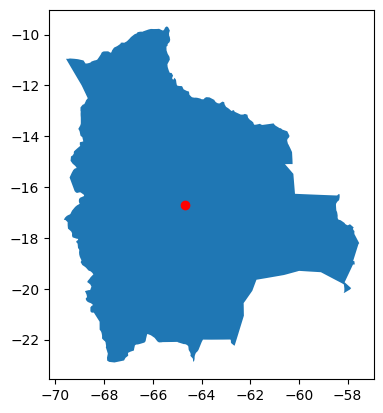

In [93]:
#replotamos
base4326=bolivia.to_crs(4326).plot()
bolivia.to_crs(4326).centroid.plot(color='red',ax=base4326)

Nos quedamos con la versión proyectada de los mapas:

In [94]:
bolivia_4326=bolivia.to_crs(4326)

provinciasBolivia_4326=provinciasBolivia_clipped.to_crs(bolivia_4326.crs)

roadsBolivia_4326=roadsBolivia_clipped.to_crs(bolivia_4326.crs)

In [95]:
#Guardamos
import os

bolivia_4326.to_file(os.path.join("data","boliviaMaps_4326.gpkg"), layer='country', driver="GPKG")
provinciasBolivia_4326.to_file(os.path.join("data","boliviaMaps_4326.gpkg"), layer='provinces', driver="GPKG")
roadsBolivia_4326.to_file(os.path.join("data","boliviaMaps_4326.gpkg"), layer='roads', driver="GPKG")
bolivia_4326.centroid.to_file(os.path.join("data","boliviaMaps_4326.gpkg"), layer='centroid', driver="GPKG")

C:\Users\Nicolas Silva\AppData\Local\Temp\ipykernel_28424\1288499317.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bolivia_4326.centroid.to_file(os.path.join("data","boliviaMaps_4326.gpkg"), layer='centroid', driver="GPKG")


### Aeropuertos

Ahora creamos los puntos para el mapa de los aeropuertos en Bolivia

In [96]:
import pandas as pd 
infoairports = pd.read_csv(os.path.join("data","bo-airports.csv"))

Limpiamos la data de los aeropuertos

In [97]:
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,6184,SLLP,medium_airport,El Alto International Airport,-16.5132999420166,-68.19229888916016,13355,SA,Bolivia,BO,...,La Paz / El Alto,1,SLLP,LPB,NaN,NaN,https://en.wikipedia.org/wiki/El_Alto_Internat...,NaN,750,2008-07-14T12:56:12+00:00
1,6193,SLVR,large_airport,Viru Viru International Airport,-17.6448,-63.135399,1224,SA,Bolivia,BO,...,Santa Cruz,1,SLVR,VVI,NaN,NaN,https://en.wikipedia.org/wiki/Viru_Viru_Intern...,NaN,1050,2019-01-13T13:52:47+00:00
2,6180,SLCB,medium_airport,Jorge Wilsterman International Airport,-17.421100616455078,-66.1771011352539,8360,SA,Bolivia,BO,...,Cochabamba,1,SLCB,CBB,NaN,NaN,https://en.wikipedia.org/wiki/Jorge_Wilsterman...,NaN,750,2008-07-14T12:56:12+00:00
3,6189,SLSU,medium_airport,Juana Azurduy De Padilla Airport,-19.007099,-65.288696,9540,SA,Bolivia,BO,...,Sucre,0,SLSU,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Juana_Azurduy_de...,military,750,2020-02-09T15:04:10+00:00
4,6183,SLET,medium_airport,El Trompillo Airport,-17.8115997314,-63.1715011597,1371,SA,Bolivia,BO,...,Santa Cruz,1,SLET,SRZ,NaN,NaN,https://en.wikipedia.org/wiki/El_Trompillo_Air...,NaN,750,2012-01-28T13:03:47+00:00


Nos quedamos con las columnas de nuestro interés

In [98]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]


In [99]:
infoairports.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           205 non-null    object
 1   type           205 non-null    object
 2   latitude_deg   205 non-null    object
 3   longitude_deg  205 non-null    object
 4   elevation_ft   199 non-null    object
 5   region_name    205 non-null    object
 6   municipality   201 non-null    object
dtypes: object(7)
memory usage: 11.3+ KB


Formatemaos las columnas

In [100]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now 
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           205 non-null    object 
 1   type           205 non-null    object 
 2   latitude_deg   205 non-null    float64
 3   longitude_deg  205 non-null    float64
 4   elevation_ft   199 non-null    float64
 5   region_name    205 non-null    object 
 6   municipality   201 non-null    object 
dtypes: float64(3), object(4)
memory usage: 11.3+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

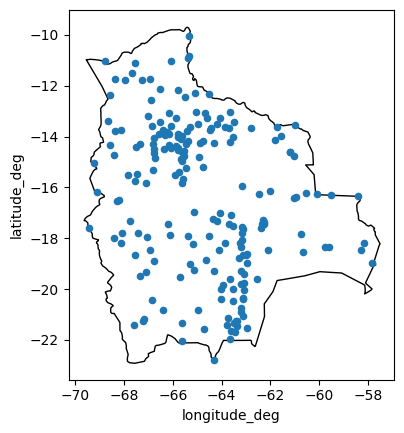

In [101]:
#Ploteamos

base = bolivia_4326.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [102]:
#Corregimos coordenadas (Estaban en grados - unprojected)
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=bolivia.crs.to_epsg())# the coordinates were in degrees - unprojected

In [103]:
#Revisamos los tipos de datos
type(airports), type(infoairports)


(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

Proyectamos los datos

In [104]:
airports_4326=airports.to_crs(4326)
airports_4326.plot(ax=base)

<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

In [105]:
airports_4326['type'].value_counts() # this will not work: airports.type.value_counts()

type
small_airport     182
medium_airport     18
heliport            3
large_airport       1
closed              1
Name: count, dtype: int64

In [106]:
airports_4326.rename(columns={'type':'kind'},inplace=True)

Guardamos el mapa proyectado de los aeropuertos

In [107]:
airports_4326.to_file(os.path.join("data","boliviaMaps_4326.gpkg"), layer='airports', driver="GPKG")


### Ploteamos el mapa completo (aeropuertos, provincias y autopistas)

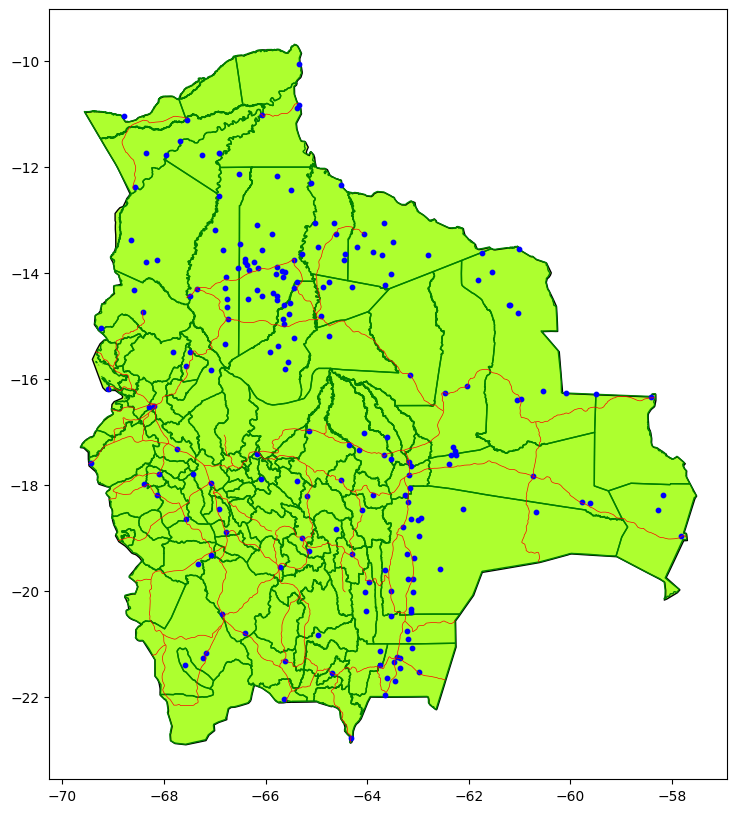

In [108]:
import matplotlib.pyplot as plt

# Crear base del mapa con el país Bolivia
base = bolivia_4326.plot(color='greenyellow', edgecolor='black', figsize=(10, 10))

# Añadir las provincias
provinciasBolivia_4326.plot(ax=base, color='none', edgecolor='green')

# Añadir las carreteras
roadsBolivia_4326.plot(ax=base, edgecolor='red', linewidth=0.5)

# Añadir los aeropuertos
airports_4326.plot(ax=base, color='blue', marker='o', markersize=10)

# Mostrar el gráfico
plt.show()
